# Spectral Representation Method
Author: Lohit Vandanapu
Date: August 19, 2018
Last Modified: May 09, 2019

In this example, the Spectral Representation Method is used to generate stochastic processes from a prescribed Power Spectrum and associated Cross Spectral Density. This example illustrates how to use the SRM class for 'n' dimensional and 'm' variable case and compare the statistics of the generated stochastic processes with the expected values.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the SRM class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.StochasticProcess import SRM
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
plt.style.use('seaborn')

The input parameters necessary for the generation of the stochastic processes are given below:

In [2]:
# Number of samples
n_sim = 100

# Number of Dimensions
n = 2

# Number of Variables
m = 3

# Input Data
# Time
T = 10  # Simulation Time
dt = 0.1
nt = int(T / dt) + 1
t = np.linspace(0, T, nt)

# Frequency
nw = 100
W = np.array([1.5, 2.5])
dw = W / (nw - 1)
x_list = [np.linspace(dw[i], W[i], nw) for i in range(n)]
xy_list = np.array(np.meshgrid(*x_list, indexing='ij'))

Make sure that the input parameters are in order to prevent aliasing

In [3]:
t_u = 2*np.pi/2/W

if dt>t_u.all():
    print('Error')

Defining the Power Spectral Density Function (S) and the Cross Spectral Density (g)

In [4]:
S_11 = 125 / 4 * np.linalg.norm(xy_list, axis=0) ** 2 * np.exp(-5 * np.linalg.norm(xy_list, axis=0))
S_22 = 125 / 4 * np.linalg.norm(xy_list, axis=0) ** 2 * np.exp(-3 * np.linalg.norm(xy_list, axis=0))
S_33 = 125 / 4 * np.linalg.norm(xy_list, axis=0) ** 2 * np.exp(-7 * np.linalg.norm(xy_list, axis=0))

g_12 = np.exp(-0.1757 * np.linalg.norm(xy_list, axis=0))
g_13 = np.exp(-3.478 * np.linalg.norm(xy_list, axis=0))
g_23 = np.exp(-3.392 * np.linalg.norm(xy_list, axis=0))

S_list = np.array([S_11, S_22, S_33])
g_list = np.array([g_12, g_13, g_23])

# Assembly of S_jk
S_sqrt = np.sqrt(S_list)
S_jk = np.einsum('i...,j...->ij...', S_sqrt, S_sqrt)
# Assembly of g_jk
g_jk = np.zeros_like(S_jk)
counter = 0
for i in range(m):
    for j in range(i + 1, m):
        g_jk[i, j] = g_list[counter]
        counter = counter + 1
g_jk = np.einsum('ij...->ji...', g_jk) + g_jk

for i in range(m):
    g_jk[i, i] = np.ones_like(S_jk[0, 0])
S = S_jk * g_jk

In [5]:
SRM_object = SRM(n_sim, S, [dt, dt], dw, [nt, nt], [nw, nw])
samples = SRM_object.samples

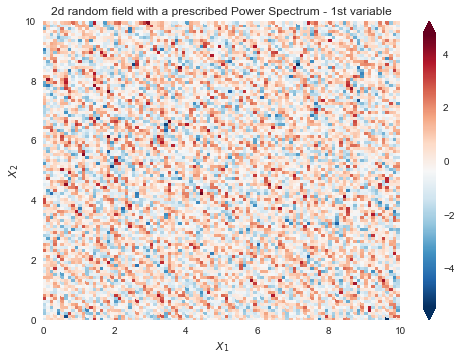

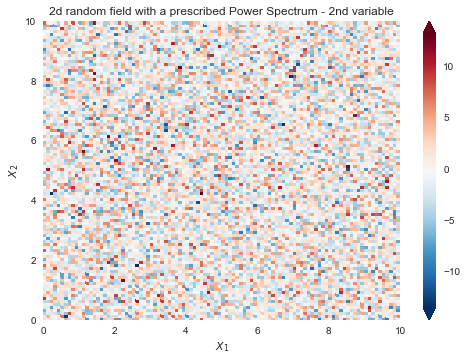

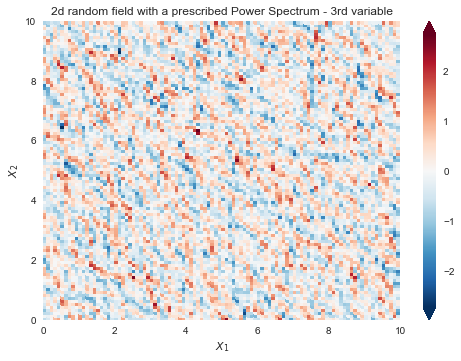

In [6]:
t_list = [t for _ in range(n)]
tt_list = np.array(np.meshgrid(*t_list, indexing='ij'))

fig1 = plt.figure()
plt.title('2d random field with a prescribed Power Spectrum - 1st variable')
pcm = pcolor(tt_list[0], tt_list[1], samples[0, 0, :, :], cmap='RdBu_r')
plt.colorbar(pcm, extend='both', orientation='vertical')
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.show()

fig2 = plt.figure()
plt.title('2d random field with a prescribed Power Spectrum - 2nd variable')
pcm = pcolor(tt_list[0], tt_list[1], samples[0, 1, :, :], cmap='RdBu_r')
plt.colorbar(pcm, extend='both', orientation='vertical')
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.show()

fig3 = plt.figure()
plt.title('2d random field with a prescribed Power Spectrum - 3rd variable')
pcm = pcolor(tt_list[0], tt_list[1], samples[0, 2, :, :], cmap='RdBu_r')
plt.colorbar(pcm, extend='both', orientation='vertical')
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.show()

In [7]:
print('The mean of the samples is ', np.mean(samples), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples), 'whereas the expected variance is ', np.sum(S_list)*np.prod(dw)*(2**n)/m)

The mean of the samples is  -0.000244883299710749 whereas the expected mean is 0.000
The variance of the samples is  4.884552313145047 whereas the expected variance is  4.88934917355366
